In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv('brasileiro_tab.csv')
df.set_index('Time',inplace=True)
df['Aproveitamento'] = df['Aproveitamento'].str.replace(',', '.').astype(float)

In [ ]:
df.describe().round(1)

,Posicao,Pontos,Vitorias,Empates,Derrotas,Saldo,Aproveitamento
count,218.0,218.0,218.0,218.0,218.0,218.0,218.0
mean,7.8,57.5,15.8,10.2,12.1,7.3,50.4
std,4.9,10.5,3.8,2.7,3.6,13.7,9.2
min,1.0,27.0,5.0,3.0,3.0,-30.0,23.7
25%,3.2,50.0,13.0,8.0,10.0,-1.0,43.9
50%,7.0,56.0,15.0,10.0,12.0,7.0,49.1
75%,12.0,65.0,18.0,12.0,14.0,17.0,57.0
max,20.0,90.0,28.0,17.0,22.0,49.0,79.0


In [ ]:
pos_media=df['Posicao'].mean().round(1)
pt_media=df['Pontos'].mean().round(1)
vit_media=df['Vitorias'].mean().round(1)
emp_media=df['Empates'].mean().round(1)
der_media=df['Derrotas'].mean().round(1)
sg_media=df['Saldo'].mean().round(1)
ap_media=df['Aproveitamento'].mean().round(1)

In [ ]:
media_pos=df.groupby('Time')['Posicao'].mean().round(1)
df.sort_values(by="Posicao")
media_pos=pd.DataFrame(media_pos)
media_pos=media_pos.sort_values(by="Posicao")
media_pos

,Posicao
Time,
GRE,5.6
FLA,6.2
SAO,6.2
INT,6.8
PAL,6.8
CAM,6.9
COR,7.3
CRU,7.6
SAN,8.1


In [ ]:
media_pt=df.groupby('Time')['Pontos'].mean().round(1)
df.sort_values(by="Pontos")
media_pt=pd.DataFrame(media_pt)
media_pt=media_pt.sort_values(by="Pontos")
media_pt

,Pontos
Time,
VAS,49.8
BOT,51.3
CAP,53.4
FLU,55.2
SAN,55.7
CRU,57.4
COR,58.5
INT,59.1
CAM,59.3


In [ ]:
media_vit=df.groupby('Time')['Vitorias'].mean().round(1)
df.sort_values(by="Vitorias")
media_vit=pd.DataFrame(media_vit)
media_vit=media_vit.sort_values(by="Vitorias")
media_vit

,Vitorias
Time,
VAS,12.8
BOT,13.7
CAP,14.6
FLU,15.1
SAN,15.1
COR,15.7
CRU,16.0
INT,16.2
CAM,16.6


In [ ]:
media_emp=df.groupby('Time')['Empates'].mean().round(1)
df.sort_values(by="Empates")
media_emp=pd.DataFrame(media_emp)
media_emp=media_emp.sort_values(by="Empates")
media_emp

,Empates
Time,
CAM,9.4
CRU,9.4
CAP,9.5
GRE,9.5
PAL,9.8
FLU,9.9
FLA,10.1
BOT,10.2
SAN,10.3


In [ ]:
media_der=df.groupby('Time')['Derrotas'].mean().round(1)
df.sort_values(by="Derrotas")
media_der=pd.DataFrame(media_der)
media_der=media_der.sort_values(by="Derrotas")
media_der

,Derrotas
Time,
SAO,10.2
FLA,10.8
COR,10.9
GRE,11.2
PAL,11.3
INT,11.4
CAM,12.0
CRU,12.6
SAN,12.6


In [ ]:
media_sg=df.groupby('Time')['Saldo'].mean().round(1)
df.sort_values(by="Saldo")
media_sg=pd.DataFrame(media_sg)
media_sg=media_sg.sort_values(by="Saldo")
media_sg

,Saldo
Time,
VAS,-6.0
BOT,0.2
CAP,1.6
FLU,4.7
SAN,6.7
CRU,7.9
COR,8.3
CAM,8.6
INT,9.2


In [ ]:
media_ap=df.groupby('Time')['Aproveitamento'].mean().round(1)
df.sort_values(by="Aproveitamento")
media_ap=pd.DataFrame(media_ap)
media_ap=media_ap.sort_values(by="Aproveitamento")
media_ap

,Aproveitamento
Time,
VAS,43.7
BOT,45.0
CAP,46.9
FLU,48.4
SAN,48.8
CRU,50.4
COR,51.3
INT,51.8
CAM,52.0


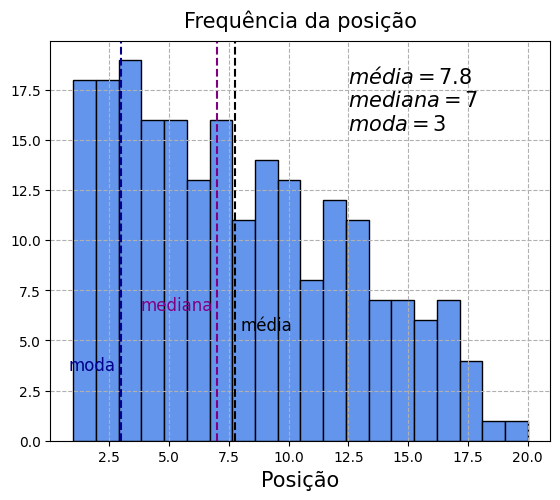

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Posicao'].mean(), df['Posicao'].median(), df['Posicao'].mode().iloc[0]

eixo.hist(df['Posicao'], bins=20, edgecolor='k',color='cornflowerblue')
eixo.set_title('Frequência da posição', fontsize=15, pad=10)
eixo.set_xlabel('Posição', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(12.5, 15.5), fontsize=15)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(8, 5.5), fontsize=12)

eixo.axvline(mediana, color='purple', linestyle='--')
eixo.annotate('mediana', xy=(3.8,6.5), fontsize=12, color='purple')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda', xy=(0.8, 3.5), fontsize=12, color='darkblue')

plt.show()

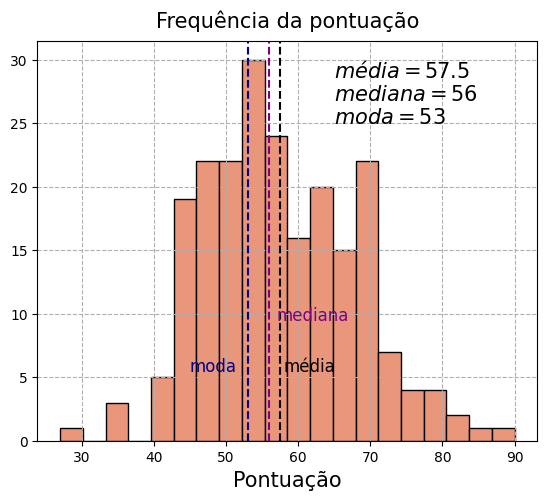

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Pontos'].mean(), df['Pontos'].median(), df['Pontos'].mode().iloc[0]

eixo.hist(df['Pontos'], bins=20, edgecolor='k',color='darksalmon')
eixo.set_title('Frequência da pontuação', fontsize=15, pad=10)
eixo.set_xlabel('Pontuação', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(65, 25), fontsize=15)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(58, 5.5), fontsize=12, color='black')

eixo.axvline(mediana, color='purple', linestyle='--')
eixo.annotate('mediana', xy=(57,9.5), fontsize=12, color='purple')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda', xy=(45, 5.5), fontsize=12, color='darkblue')

plt.show()

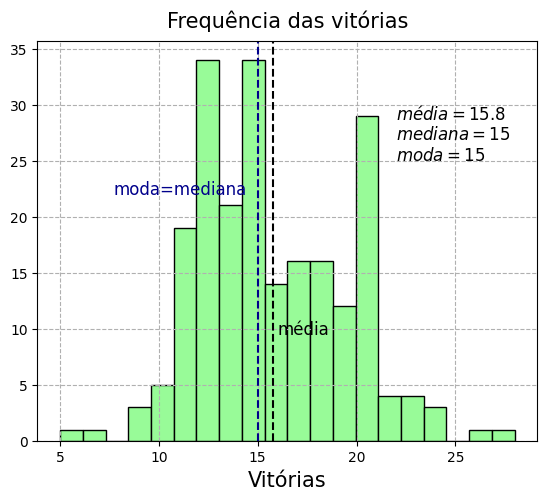

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Vitorias'].mean(), df['Vitorias'].median(), df['Vitorias'].mode().iloc[0]

eixo.hist(df['Vitorias'], bins=20, edgecolor='k',color='palegreen')
eixo.set_title('Frequência das vitórias', fontsize=15, pad=10)
eixo.set_xlabel('Vitórias', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(22, 25), fontsize=12)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(16, 9.5), fontsize=12, color='black')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda=mediana', xy=(7.7,22), fontsize=12, color='darkblue')

plt.show()

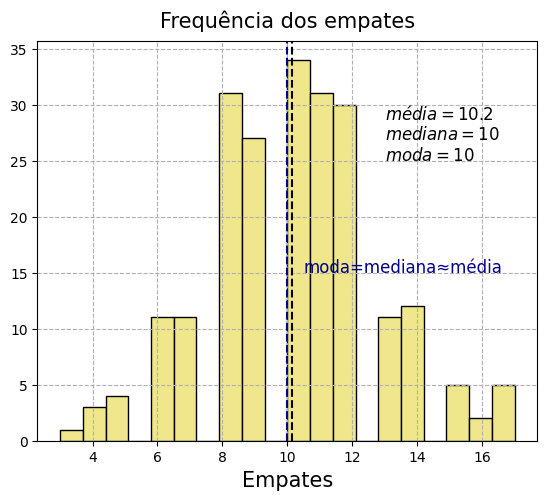

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Empates'].mean(), df['Empates'].median(), df['Empates'].mode().iloc[0]

eixo.hist(df['Empates'], bins=20, edgecolor='k',color='khaki')
eixo.set_title('Frequência dos empates', fontsize=15, pad=10)
eixo.set_xlabel('Empates', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(13, 25), fontsize=12)

eixo.axvline(mu, color = 'k', linestyle='--')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda=mediana≈média', xy=(10.5,15), fontsize=12, color='darkblue')

plt.show()

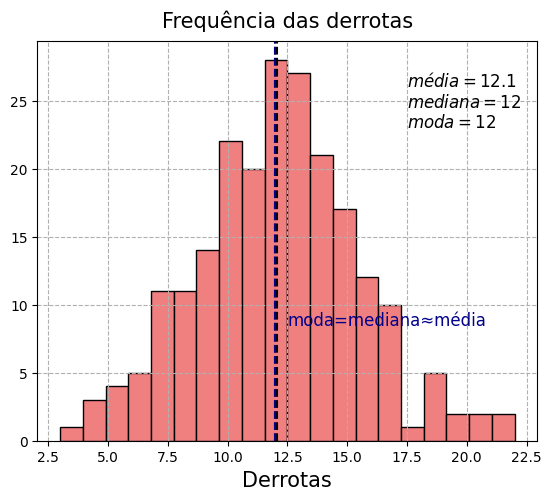

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Derrotas'].mean(), df['Derrotas'].median(), df['Derrotas'].mode().iloc[0]

eixo.hist(df['Derrotas'], bins=20, edgecolor='k',color='lightcoral')
eixo.set_title('Frequência das derrotas', fontsize=15, pad=10)
eixo.set_xlabel('Derrotas', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(17.5, 23), fontsize=12)

eixo.axvline(mu, color = 'k', linestyle='--')

eixo.axvline(mediana, color='purple', linestyle='--')
eixo.annotate('moda=mediana≈média', xy=(12.5,8.5), fontsize=12, color='darkblue')

eixo.axvline(moda, color='darkblue', linestyle='--')

plt.show()

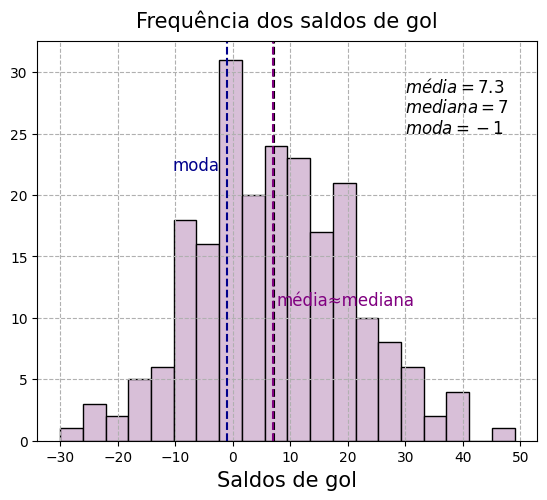

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Saldo'].mean(), df['Saldo'].median(), df['Saldo'].mode().iloc[0]

eixo.hist(df['Saldo'], bins=20, edgecolor='k',color='thistle')
eixo.set_title('Frequência dos saldos de gol', fontsize=15, pad=10)
eixo.set_xlabel('Saldos de gol', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.0f}$\n$moda={2:.0f}$'.format(mu, mediana, moda),
               xy=(30, 25), fontsize=12)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média≈mediana', xy=(7.6, 11), fontsize=12, color='purple')

eixo.axvline(mediana, color='purple', linestyle='--')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda', xy=(-10.5, 22), fontsize=12, color='darkblue')

plt.show()

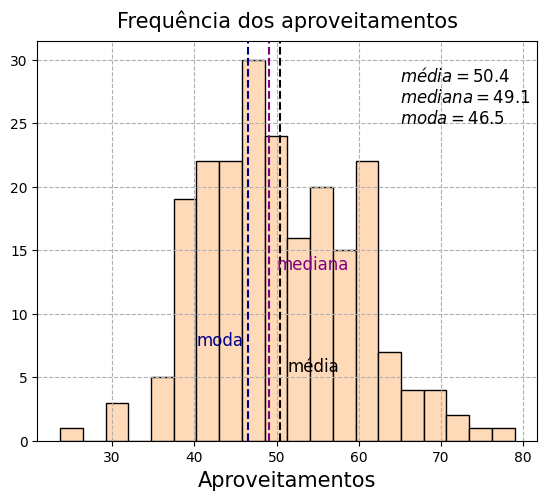

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = df['Aproveitamento'].mean(), df['Aproveitamento'].median(), df['Aproveitamento'].mode().iloc[0]

eixo.hist(df['Aproveitamento'], bins=20, edgecolor='k',color='peachpuff')
eixo.set_title('Frequência dos aproveitamentos', fontsize=15, pad=10)
eixo.set_xlabel('Aproveitamentos', fontsize=15)
eixo.grid(True, linestyle='dashed')

eixo.annotate('$média = {0:.1f}$\n$mediana = {1:.1f}$\n$moda={2:.1f}$'.format(mu, mediana, moda),
               xy=(65, 25), fontsize=12)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(51.3, 5.5), fontsize=12, color='black')

eixo.axvline(mediana, color='purple', linestyle='--')
eixo.annotate('mediana', xy=(50, 13.5), fontsize=12, color='purple')

eixo.axvline(moda, color='darkblue', linestyle='--')
eixo.annotate('moda', xy=(40.3, 7.5), fontsize=12, color='darkblue')
plt.show()

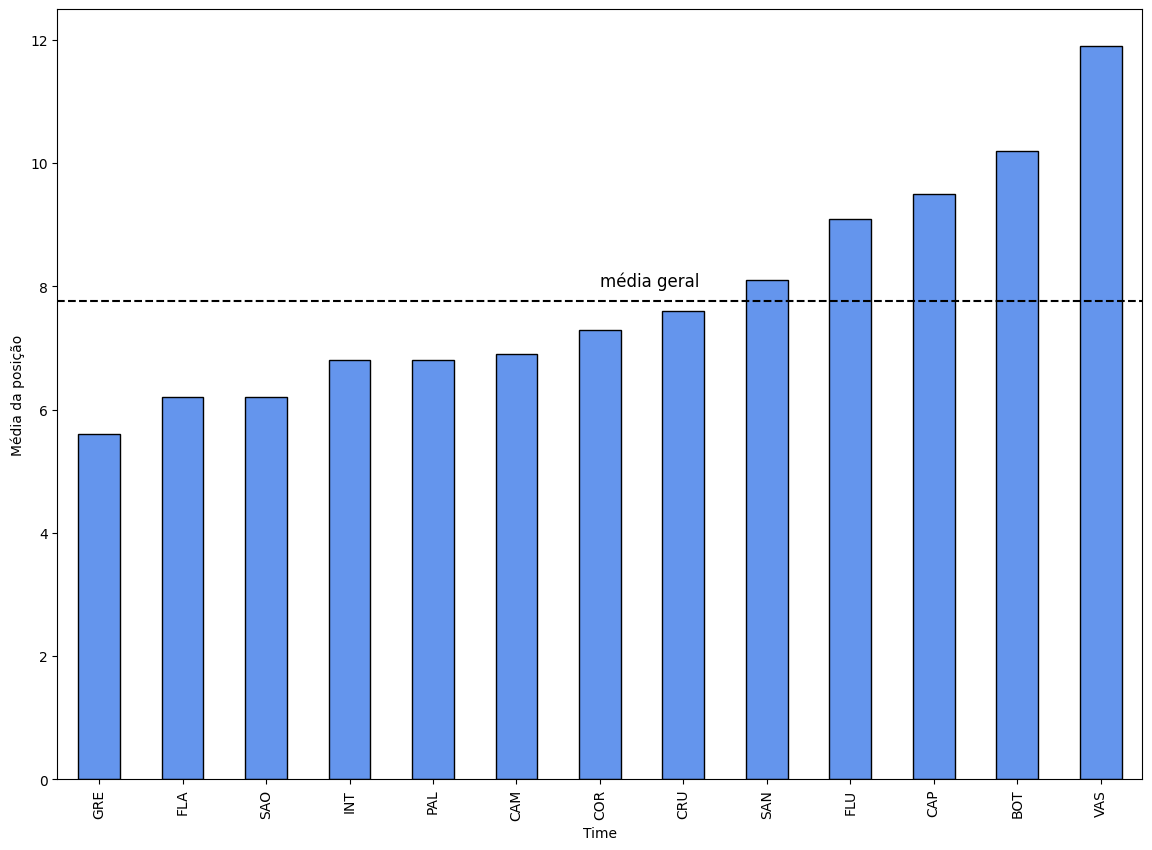

In [ ]:
media_pos.plot(kind='bar', figsize=(14, 10), color='cornflowerblue', edgecolor='black', xlabel='Time', ylabel='Média da posição', legend=False)
plt.axhline(df['Posicao'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(6, 8), fontsize=12, color='black')
plt.show()

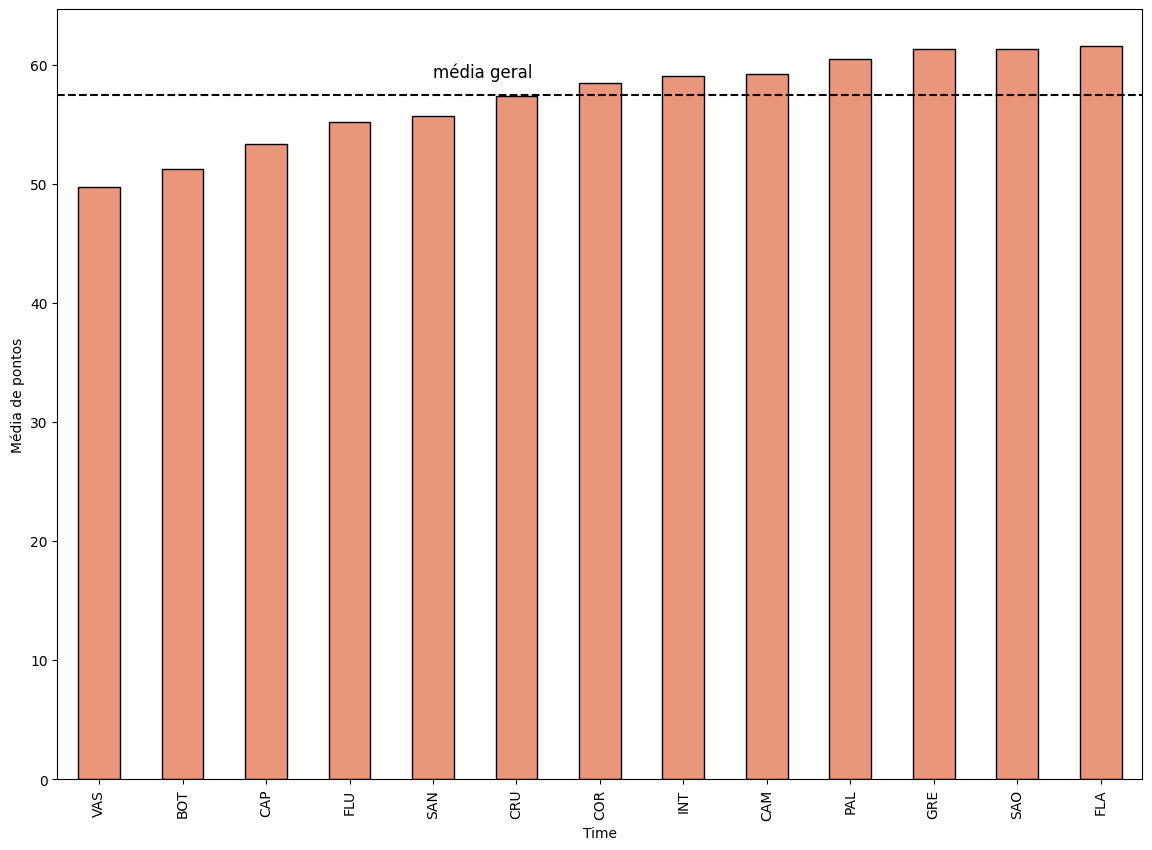

In [ ]:
media_pt.plot(kind='bar', figsize=(14, 10), color ='darksalmon', edgecolor='black', xlabel = 'Time', ylabel = 'Média de pontos',legend=False)
plt.axhline(df['Pontos'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(4, 59), fontsize=12, color='black')
plt.show()

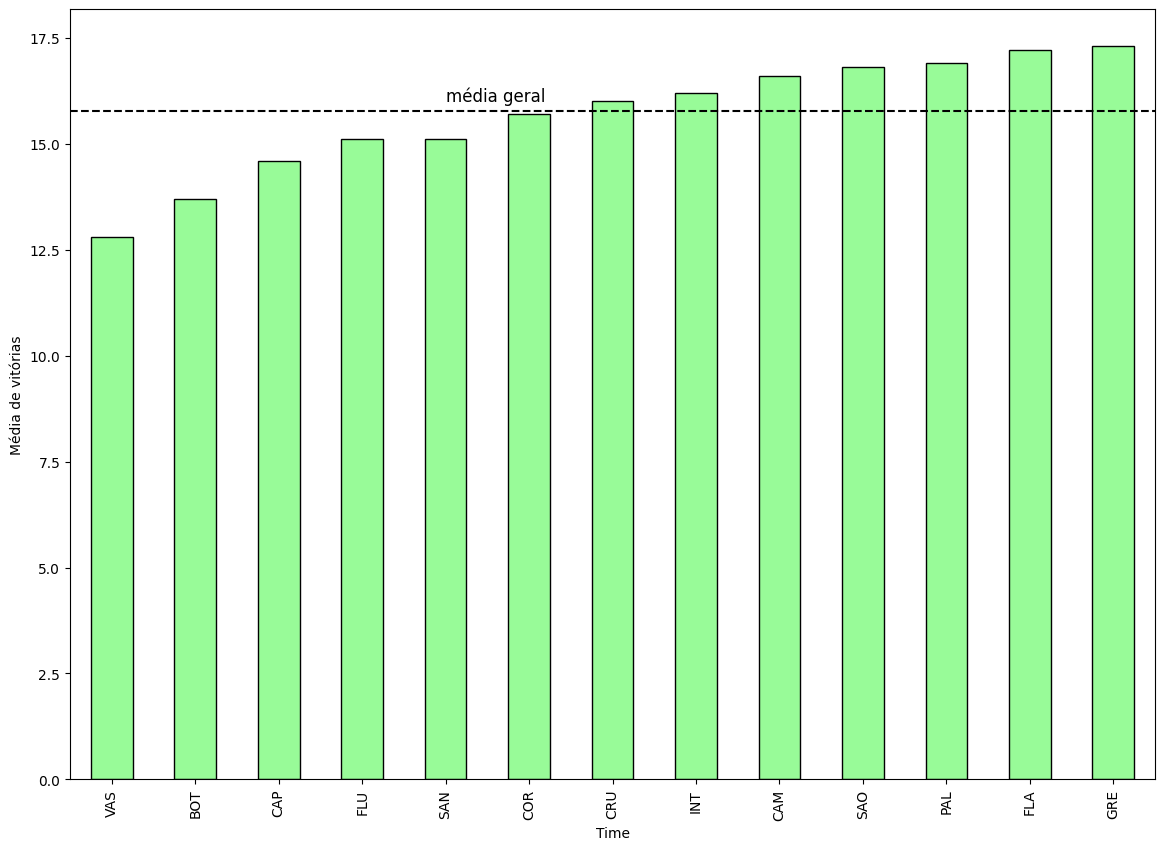

In [ ]:
media_vit.plot(kind='bar', figsize=(14, 10), color ='palegreen', edgecolor='black', xlabel = 'Time', ylabel = 'Média de vitórias',legend=False)
plt.axhline(df['Vitorias'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(4, 16), fontsize=12, color='black')
plt.show()

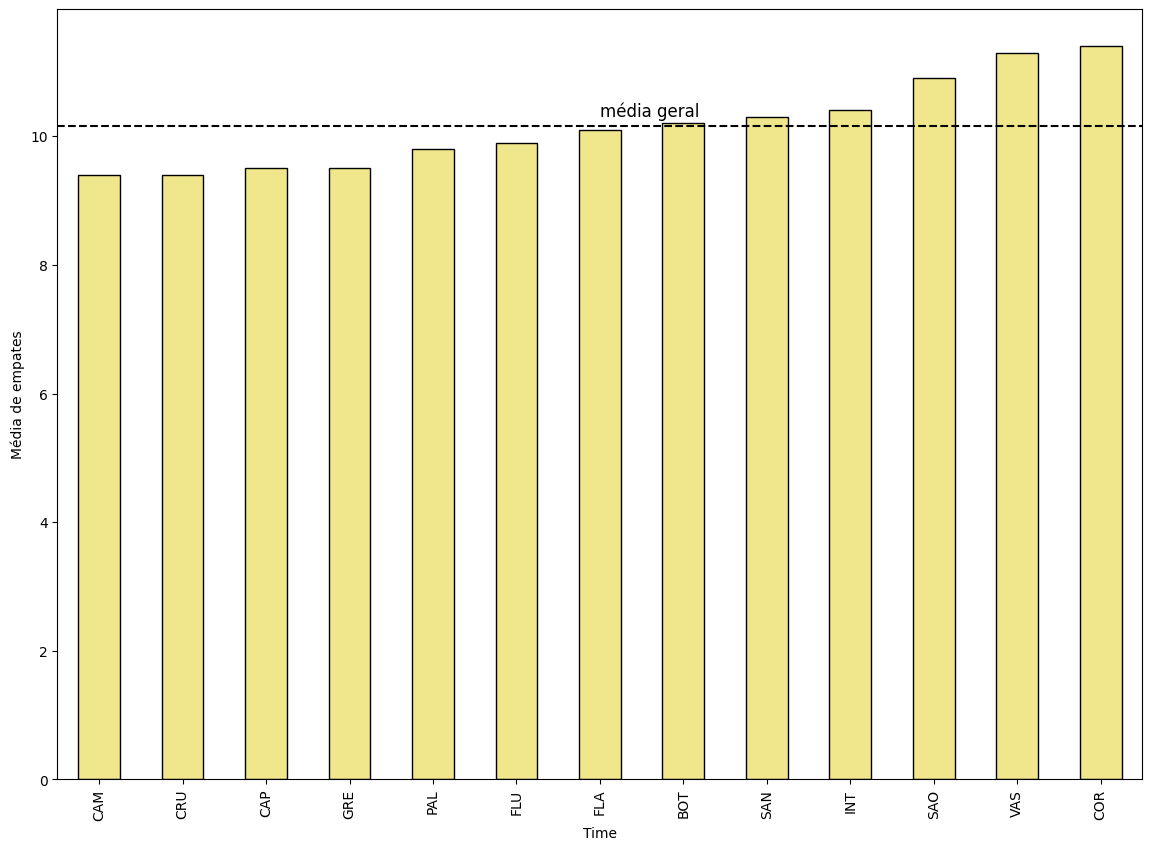

In [ ]:
media_emp.plot(kind='bar', figsize=(14, 10), color ='khaki', edgecolor='black', xlabel = 'Time', ylabel = 'Média de empates',legend=False)
plt.axhline(df['Empates'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(6, 10.3), fontsize=12, color='black')
plt.show()

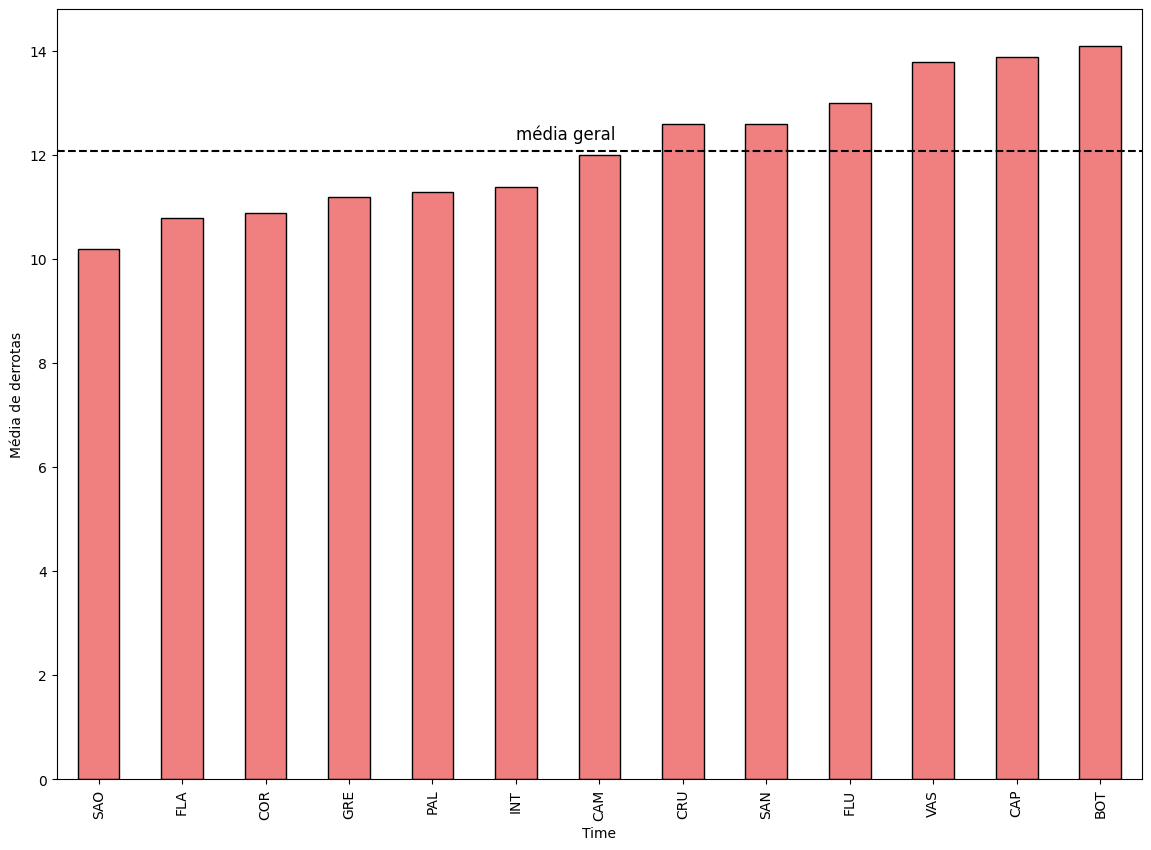

In [ ]:
media_der.plot(kind='bar', figsize=(14, 10), color ='lightcoral', edgecolor='black', xlabel = 'Time', ylabel = 'Média de derrotas',legend=False)
plt.axhline(df['Derrotas'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(5, 12.3), fontsize=12, color='black')
plt.show()

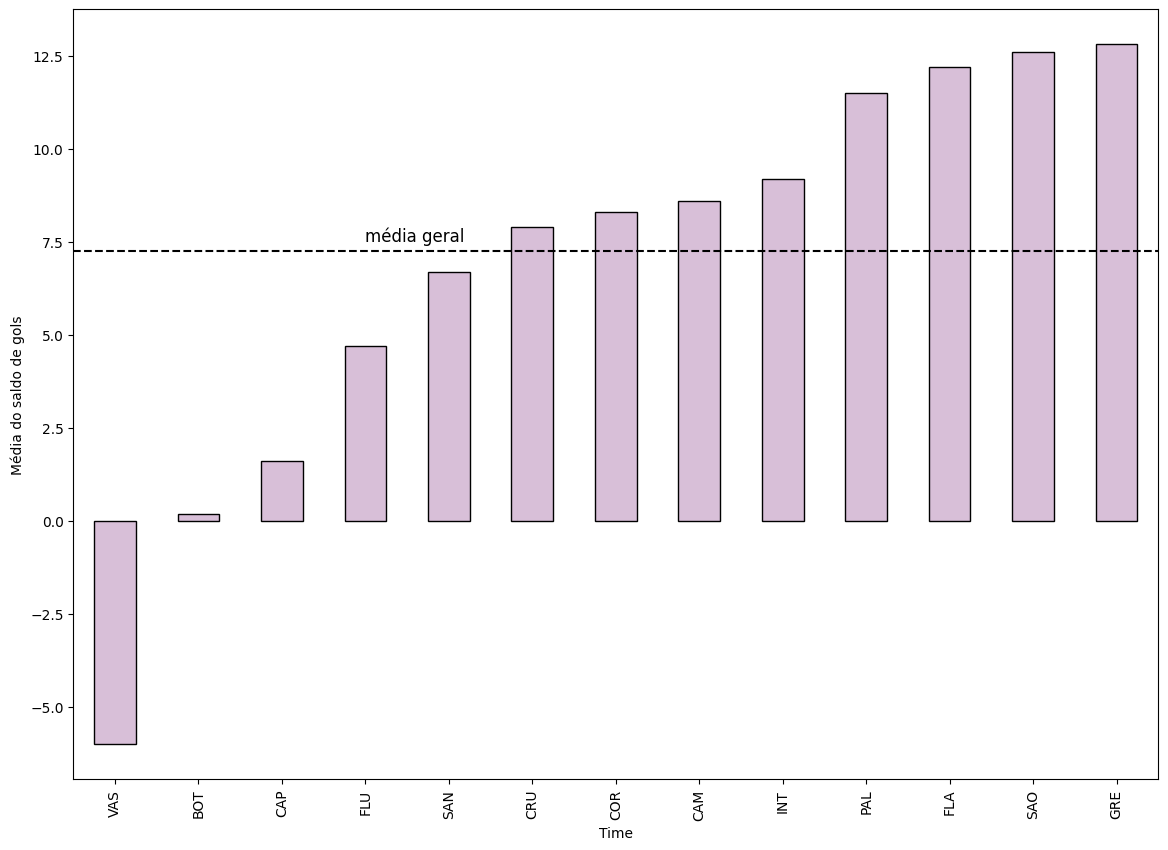

In [ ]:
media_sg.plot(kind='bar', figsize=(14, 10), color ='thistle', edgecolor='black', xlabel = 'Time', ylabel = 'Média do saldo de gols',legend=False)
plt.axhline(df['Saldo'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(3, 7.5), fontsize=12, color='black')
plt.show()

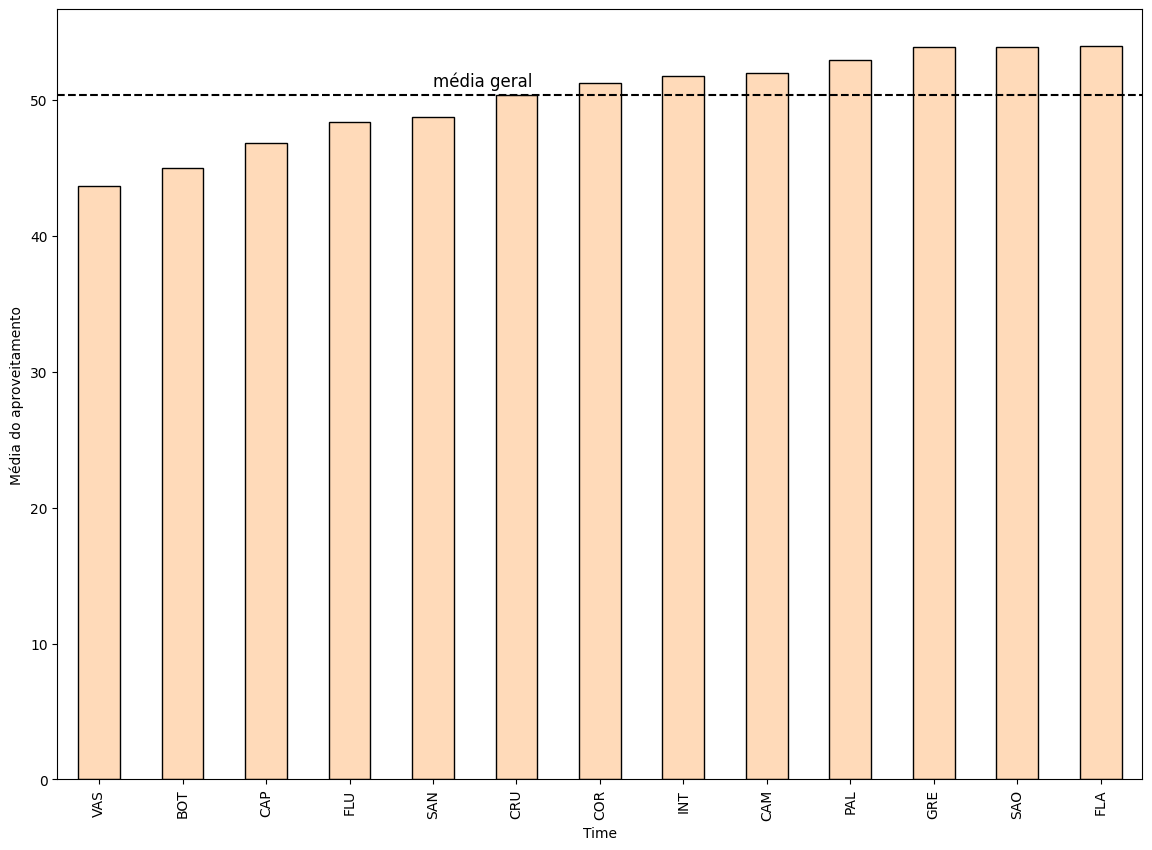

In [ ]:
media_ap.plot(kind='bar', figsize=(14, 10), color ='peachpuff', edgecolor='black', xlabel = 'Time', ylabel = 'Média do aproveitamento',legend=False)
plt.axhline(df['Aproveitamento'].mean(), color = 'k', linestyle='--')
plt.annotate('média geral', xy=(4, 51), fontsize=12, color='black')
plt.show()